## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

# Contents
1. Redistribute Data
2. Visualizations of before and after
3. Show image sizes data
4. Create Dataset
5. Display images after resizing
6. Process data
7. Display images after processing

In [1]:
%load_ext autoreload
%autoreload 2

## 1. Redistribute Data

In [ ]:
# from my_modules.file_redistribution import run_redistribution


## 2. Visualizations of before and after

In [3]:
from my_modules.file_redistribution import prepare_plot, bars_data
data_dir = "data/chest_xray"
folders = ['new_train', 'new_val', 'new_test']

# may not need to do this once everything is put together
old_folders = ['train', 'val', 'test']
old_df = prepare_plot(data_dir,old_folders)
new_df = prepare_plot(data_dir,folders)
new_df

,Dataset,Normal,Pneumonia,Total
0,new_train,1266,3418,4684
1,new_val,158,427,585
2,new_test,159,428,587


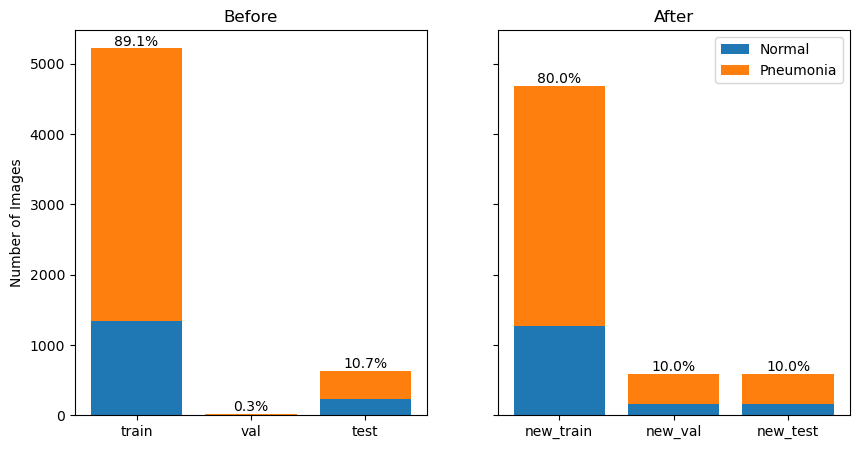

In [4]:
from my_modules.file_redistribution import compare_bar, pie
compare_bar(old_df, new_df)

In [8]:
old_df

,Dataset,Normal,Pneumonia,Total,total_rate
0,train,1341,3875,5216,89.1
1,val,8,8,16,0.3
2,test,234,390,624,10.7


In [26]:
old_df

,Dataset,Normal,Pneumonia,Total,total_rate
0,train,1341,3875,5216,89.1
1,val,8,8,16,0.3
2,test,234,390,624,10.7


In [29]:
list(old_df.iloc[0,1:3])

[1341, 3875]

In [25]:
list(old_df.iloc[0,1:2])

[1341]

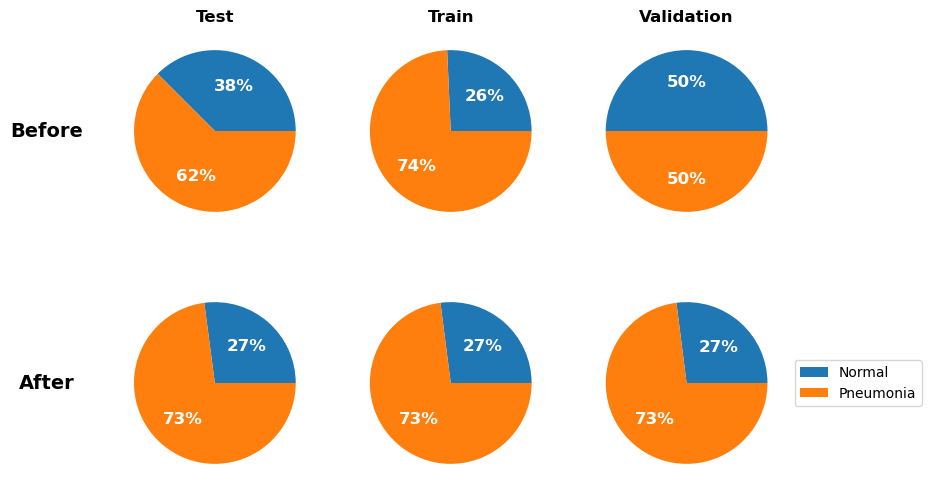

In [31]:
pie(old_df, new_df)

## 3. Show image sizes data

In [32]:
from my_modules import image_sizes

Number of images: 5271
Average width: 1330
Average height: 972
Average aspect ratio: 1.3675285705588607
Max width: 2890
Max height: 2713
Min width: 384
Min height: 127


## 4. Create Dataset

In [33]:
from my_modules.import_datasets import create_dataset, process_dataset

train_dir = "data/chest_xray/new_train"
val_dir = "data/chest_xray/new_val"
test_dir = "data/chest_xray/new_test"

train_ds = create_dataset(train_dir)
val_ds = create_dataset(val_dir)
test_ds = create_dataset(test_dir)

2024-03-03 14:44:12.718289: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 4684 files belonging to 2 classes.
Found 585 files belonging to 2 classes.
Found 587 files belonging to 2 classes.


## 5. Display images after resizing

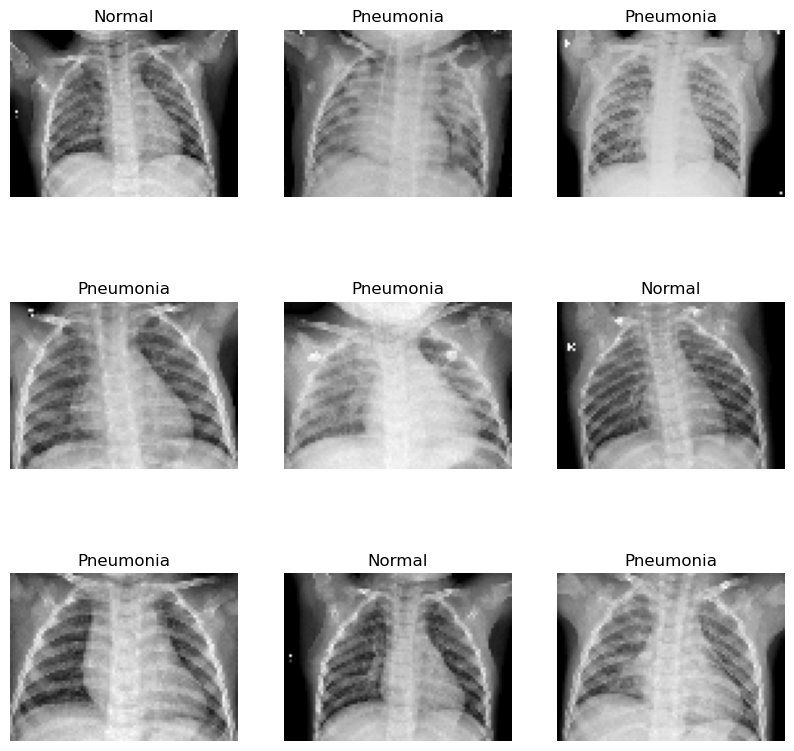

In [35]:
from my_modules.import_datasets import show_images
show_images(train_ds)

## 6. Process data

In [37]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
rescale = Rescaling(1./255)
train_ds_scaled = train_ds.map(lambda x, y: (rescale(x), y))

## 7. Display images after processing

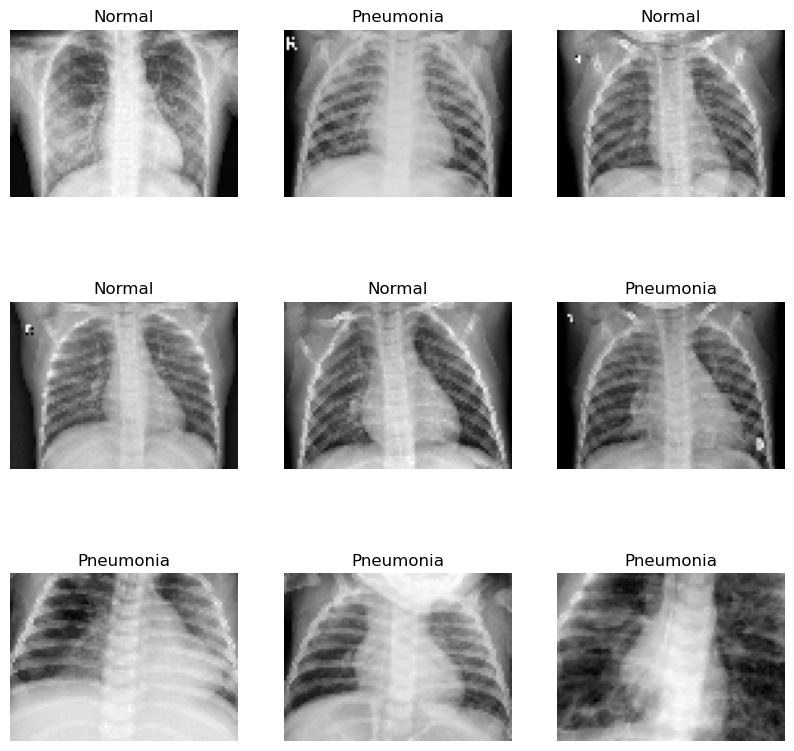

In [38]:
show_images(train_ds_scaled)